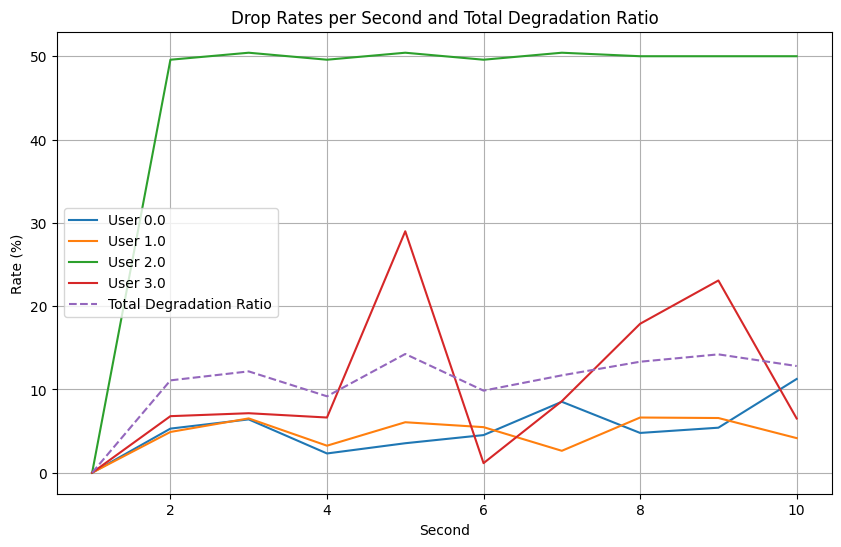

In [67]:
import math
import matplotlib.pyplot as plt

# Initialize dictionaries to store dropped packets and sent packets for each user node and each second
dropped_packets = {'0.0': {}, '1.0': {}, '2.0': {}, '3.0': {}}
sent_packets = {'0.0': {}, '1.0': {}, '2.0': {}, '3.0': {}}

# Open the trace file and process each line
with open('out.tr', 'r') as file:
    for line in file:
        # Extract elements from the line
        clean_trace = line.replace('------- ', '')
        elements = clean_trace.split()
        if len(elements) >= 11:  # Ensure the line contains enough elements
            node = elements[7]  # Source node
            time_sent = math.ceil(float(elements[1]))  # Time sent (rounded up to the nearest second)
            action = line[0]  # Action: 'd' for dropped, 'r' for received

            # Update counters for dropped packets and sent packets
            if node in dropped_packets:
                if action == 'd':
                    dropped_packets[node][time_sent] = dropped_packets[node].get(time_sent, 0) + 1
                elif action == 'r':
                    sent_packets[node][time_sent] = sent_packets[node].get(time_sent, 0) + 1

# Calculate drop rates per second for each user node
drop_rates = {}
for node in dropped_packets.keys():
    drop_rates[node] = []
    for second in range(1, max(max(dropped_packets[node], default=0), max(sent_packets[node], default=0)) + 1):
        dropped = dropped_packets[node].get(second, 0)
        sent = sent_packets[node].get(second, 0)
        drop_rate = (dropped / sent) * 100 if sent > 0 else 0  # Avoid division by zero
        drop_rates[node].append(drop_rate)

# Plot drop rates per second for each user node
plt.figure(figsize=(10, 6))
for node, rates in drop_rates.items():
    plt.plot(range(1, len(rates) + 1), rates, label=f'User {node}')

# Calculate and plot the total degradation ratio over time
total_dropped = [sum(dropped_packets[node].get(second, 0) for node in dropped_packets.keys()) for second in range(1, max(max(dropped_packets[node], default=0), max(sent_packets[node], default=0)) + 1)]
total_sent = [sum(sent_packets[node].get(second, 0) for node in sent_packets.keys()) for second in range(1, max(max(dropped_packets[node], default=0), max(sent_packets[node], default=0)) + 1)]
total_degradation_ratio = [(total_dropped[i] / total_sent[i]) * 100 if total_sent[i] > 0 else 0 for i in range(len(total_dropped))]
plt.plot(range(1, len(total_degradation_ratio) + 1), total_degradation_ratio, label='Total Degradation Ratio', linestyle='--')

plt.xlabel('Second')
plt.ylabel('Rate (%)')
plt.title('Drop Rates per Second and Total Degradation Ratio')
plt.legend()
plt.grid(True)
plt.show()